In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Comparative tables - GRU

In [2]:
#Call for the metrics of simple GRU and Had
df_gru = pd.read_csv(f"POST-HOC/Results_GRU/metrics_GRU.csv")
df_gru_had = pd.read_csv(f"INTRINSIC/Results_GRU_Had/metrics_GRU_Had.csv")

### Average of splits

In [3]:
def create_summary_df(metric_name, df_gru, df_gru_had):
    summary_df = pd.DataFrame(index=['GRU µ', 'GRU σ', 'GRU+Had µ', 'GRU+Had σ', 'Difference µ', 'Difference σ'], columns=range(1, 15))
    
    for timestep in range(1, 15):
        gru_mean = df_gru[df_gru['Time Step'] == timestep][metric_name].mean()
        gru_std = df_gru[df_gru['Time Step'] == timestep][metric_name].std()
        
        gru_had_mean = df_gru_had[df_gru_had['Time Step'] == timestep][metric_name].mean()
        gru_had_std = df_gru_had[df_gru_had['Time Step'] == timestep][metric_name].std()
        
        summary_df.at['GRU µ', timestep] = np.round(gru_mean, 3)
        summary_df.at['GRU σ', timestep] = np.round(gru_std, 3)
        summary_df.at['GRU+Had µ', timestep] = np.round(gru_had_mean, 3)
        summary_df.at['GRU+Had σ', timestep] = np.round(gru_had_std, 3)
        summary_df.at['Difference µ', timestep] = np.round(gru_mean - gru_had_mean, 3)
        summary_df.at['Difference σ', timestep] = np.round(gru_std - gru_had_std, 3)
    
    return summary_df

summary_dfs = {}
for metric in ['Specificity', 'Recall', 'ROC AUC']:
    summary_dfs[metric] = create_summary_df(metric, df_gru, df_gru_had)

**Specificity**


In [4]:
summary_dfs['Specificity']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
GRU µ,0.789,0.766,0.764,0.752,0.752,0.718,0.694,0.657,0.663,0.661,0.627,0.609,0.607,0.598
GRU σ,0.022,0.016,0.027,0.031,0.032,0.043,0.05,0.079,0.044,0.025,0.043,0.057,0.046,0.066
GRU+Had µ,0.893,0.854,0.835,0.817,0.81,0.784,0.788,0.766,0.753,0.745,0.744,0.716,0.711,0.697
GRU+Had σ,0.039,0.027,0.016,0.001,0.01,0.004,0.016,0.02,0.012,0.011,0.01,0.006,0.002,0.001
Difference µ,-0.103,-0.088,-0.072,-0.065,-0.058,-0.066,-0.094,-0.11,-0.09,-0.084,-0.117,-0.107,-0.105,-0.1
Difference σ,-0.017,-0.011,0.011,0.03,0.022,0.039,0.034,0.059,0.032,0.014,0.033,0.051,0.044,0.065


In [5]:
summary_dfs['Specificity'].mean(axis=1).round(4)

GRU µ           0.6898
GRU σ           0.0415
GRU+Had µ       0.7795
GRU+Had σ       0.0125
Difference µ   -0.0899
Difference σ    0.0290
dtype: float64

**Recall**

In [6]:
summary_dfs['Recall']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
GRU µ,0.669,0.682,0.623,0.629,0.63,0.636,0.661,0.65,0.654,0.685,0.687,0.716,0.697,0.771
GRU σ,0.017,0.012,0.017,0.016,0.031,0.038,0.008,0.029,0.025,0.012,0.0,0.009,0.012,0.041
GRU+Had µ,0.653,0.648,0.627,0.648,0.643,0.632,0.681,0.672,0.675,0.698,0.716,0.738,0.728,0.748
GRU+Had σ,0.075,0.042,0.023,0.001,0.013,0.021,0.048,0.032,0.032,0.007,0.042,0.04,0.056,0.058
Difference µ,0.017,0.034,-0.004,-0.02,-0.012,0.005,-0.02,-0.022,-0.021,-0.014,-0.03,-0.022,-0.031,0.023
Difference σ,-0.057,-0.03,-0.006,0.015,0.018,0.017,-0.039,-0.003,-0.007,0.005,-0.042,-0.031,-0.045,-0.016


In [7]:
summary_dfs['Recall'].mean(axis=1).round(4)

GRU µ           0.6707
GRU σ           0.0191
GRU+Had µ       0.6791
GRU+Had σ       0.0350
Difference µ   -0.0084
Difference σ   -0.0158
dtype: float64

**ROC-AUC**

In [8]:
summary_dfs['ROC AUC']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
GRU µ,0.83,0.779,0.747,0.745,0.756,0.743,0.73,0.71,0.715,0.723,0.724,0.722,0.701,0.746
GRU σ,0.029,0.011,0.006,0.015,0.028,0.017,0.041,0.056,0.034,0.035,0.026,0.034,0.037,0.023
GRU+Had µ,0.816,0.812,0.769,0.782,0.78,0.773,0.796,0.784,0.775,0.775,0.782,0.782,0.761,0.771
GRU+Had σ,0.021,0.014,0.006,0.0,0.027,0.017,0.013,0.012,0.01,0.004,0.017,0.015,0.001,0.019
Difference µ,0.014,-0.033,-0.021,-0.037,-0.024,-0.03,-0.066,-0.074,-0.06,-0.051,-0.058,-0.06,-0.06,-0.025
Difference σ,0.008,-0.003,-0.001,0.015,0.0,0.0,0.028,0.044,0.024,0.031,0.009,0.019,0.036,0.004


In [9]:
summary_dfs['ROC AUC'].mean(axis=1).round(4)

GRU µ           0.7408
GRU σ           0.0280
GRU+Had µ       0.7827
GRU+Had σ       0.0126
Difference µ   -0.0418
Difference σ    0.0153
dtype: float64

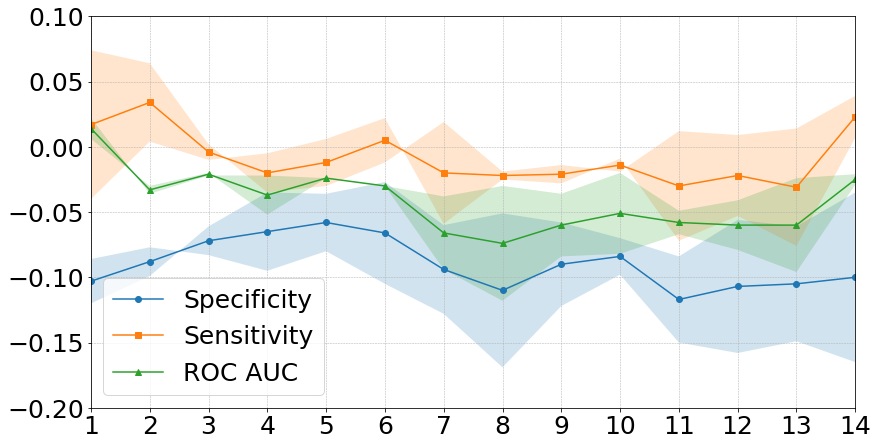

In [10]:
x = np.arange(1, 15)

# Specificity
df_s = summary_dfs['Specificity']
diff_mu_s = df_s.iloc[-2].values[0:].astype(float)
diff_sigma_s = df_s.iloc[-1].values[0:].astype(float)

diff_mu_s = np.array(diff_mu_s)
diff_sigma_s = np.array(diff_sigma_s)

# Recall
df_r = summary_dfs['Recall']
diff_mu_r = df_r.iloc[-2].values[0:].astype(float)
diff_sigma_r = df_r.iloc[-1].values[0:].astype(float)

diff_mu_r = np.array(diff_mu_r)
diff_sigma_r = np.array(diff_sigma_r)

#ROC-AUC
df_roc = summary_dfs['ROC AUC']
diff_mu_roc = df_roc.iloc[-2].values[0:].astype(float)
diff_sigma_roc = df_roc.iloc[-1].values[0:].astype(float)

diff_mu_roc = np.array(diff_mu_roc)
diff_sigma_roc = np.array(diff_sigma_roc)

#Plot figure
plt.figure(figsize=(12, 6))

plt.plot(x, diff_mu_s, label='Specificity', marker='o')
plt.fill_between(x, diff_mu_s - diff_sigma_s, diff_mu_s + diff_sigma_s, alpha=0.2)

plt.plot(x, diff_mu_r, label='Sensitivity', marker='s')
plt.fill_between(x, diff_mu_r - diff_sigma_r, diff_mu_r + diff_sigma_r, alpha=0.2)

plt.plot(x, diff_mu_roc, label='ROC AUC', marker='^')
plt.fill_between(x, diff_mu_roc - diff_sigma_roc, diff_mu_roc + diff_sigma_roc, alpha=0.2)

plt.ylim(-0.20, 0.10)
plt.xlim(1, 14)
plt.legend(fontsize=25)  # Adjust font size of the legend
plt.xticks(ticks=range(1, 14 + 1), fontsize=25)
plt.yticks(fontsize=25)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
plt.tight_layout(pad=0)
plt.savefig("./Figures_VF/Performance_comparison.pdf", bbox_inches='tight', pad_inches=0)


plt.show()